## Exploratory Data Analisys
Here, we are going to use the data that was merged in step 1 of cleaning data, before applying any changes to it.

In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
# Importing the data
data = pd.read_csv('../data/interim/all_players_data.csv', index_col=0)

First, First, let's check the columns and formulate some questions that can be answered by the data.

In [3]:
# Checking the columns
data.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s',
       'Cmp', 'Att_Passes', 'Cmp%', 'TotDist', 'PrgDist', 'Cmp.1', 'Att.1',
       'Cmp%.1', 'Cmp.2', 'Att.2', 'Cmp%.2', 'Cmp.3', 'Att.3', 'Cmp%.3', 'Ast',
       'xAG', 'xA', 'A-xAG', 'KP', '1/3', 'PPA', 'CrsPA', 'Prog', 'Matches',
       '-9999', 'Dist', 'FK', 'G-xG', 'G/Sh', 'G/SoT', 'Gls', 'PK', 'PKatt',
       'Sh', 'Sh/90', 'SoT', 'SoT%', 'SoT/90', 'np:G-xG', 'npxG', 'npxG/Sh',
       'xG', 'Att 3rd', 'Att_DefenseActs', 'Blocks', 'Clr', 'Def 3rd', 'Err',
       'Int', 'Mid 3rd', 'Pass', 'Past', 'Tkl', 'Tkl%', 'Tkl+Int', 'Tkl.1',
       'TklW', 'CS', 'CS%', 'D', 'GA', 'GA90', 'L', 'MP', 'Min', 'PKA', 'PKm',
       'PKsv', 'Save%', 'Save%.1', 'Saves', 'SoTA', 'Starts', 'W'],
      dtype='object')

Here, we can ask some questions:

- What are the most common positions?
- Which competition has the most active players?
- Does the player's age directly affect the number of minutes he can play?
- Does a team that keeps the ball and exchanges more passes necessarily have more goals?

### **Q1 - What are the most common positions?**

Text(0.5, 1.0, 'Number of players per position')

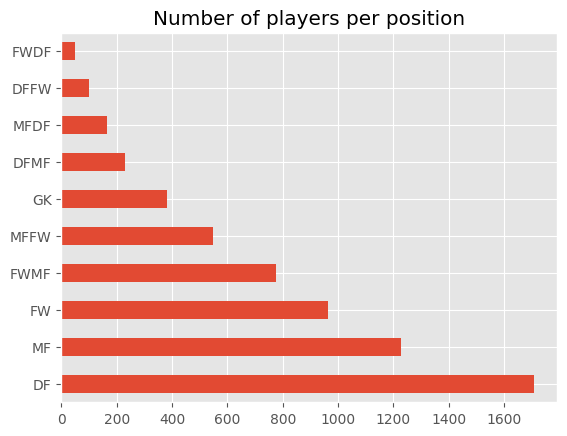

In [4]:
# Counting the amount of players per position
data.Pos.value_counts().plot.barh()
plt.title("Number of players per position")

Here we can see that defense players are the most common. Is it if this distribution is repeated in all leagues?

Text(0.5, 0.98, 'Player distributions by position in each league')

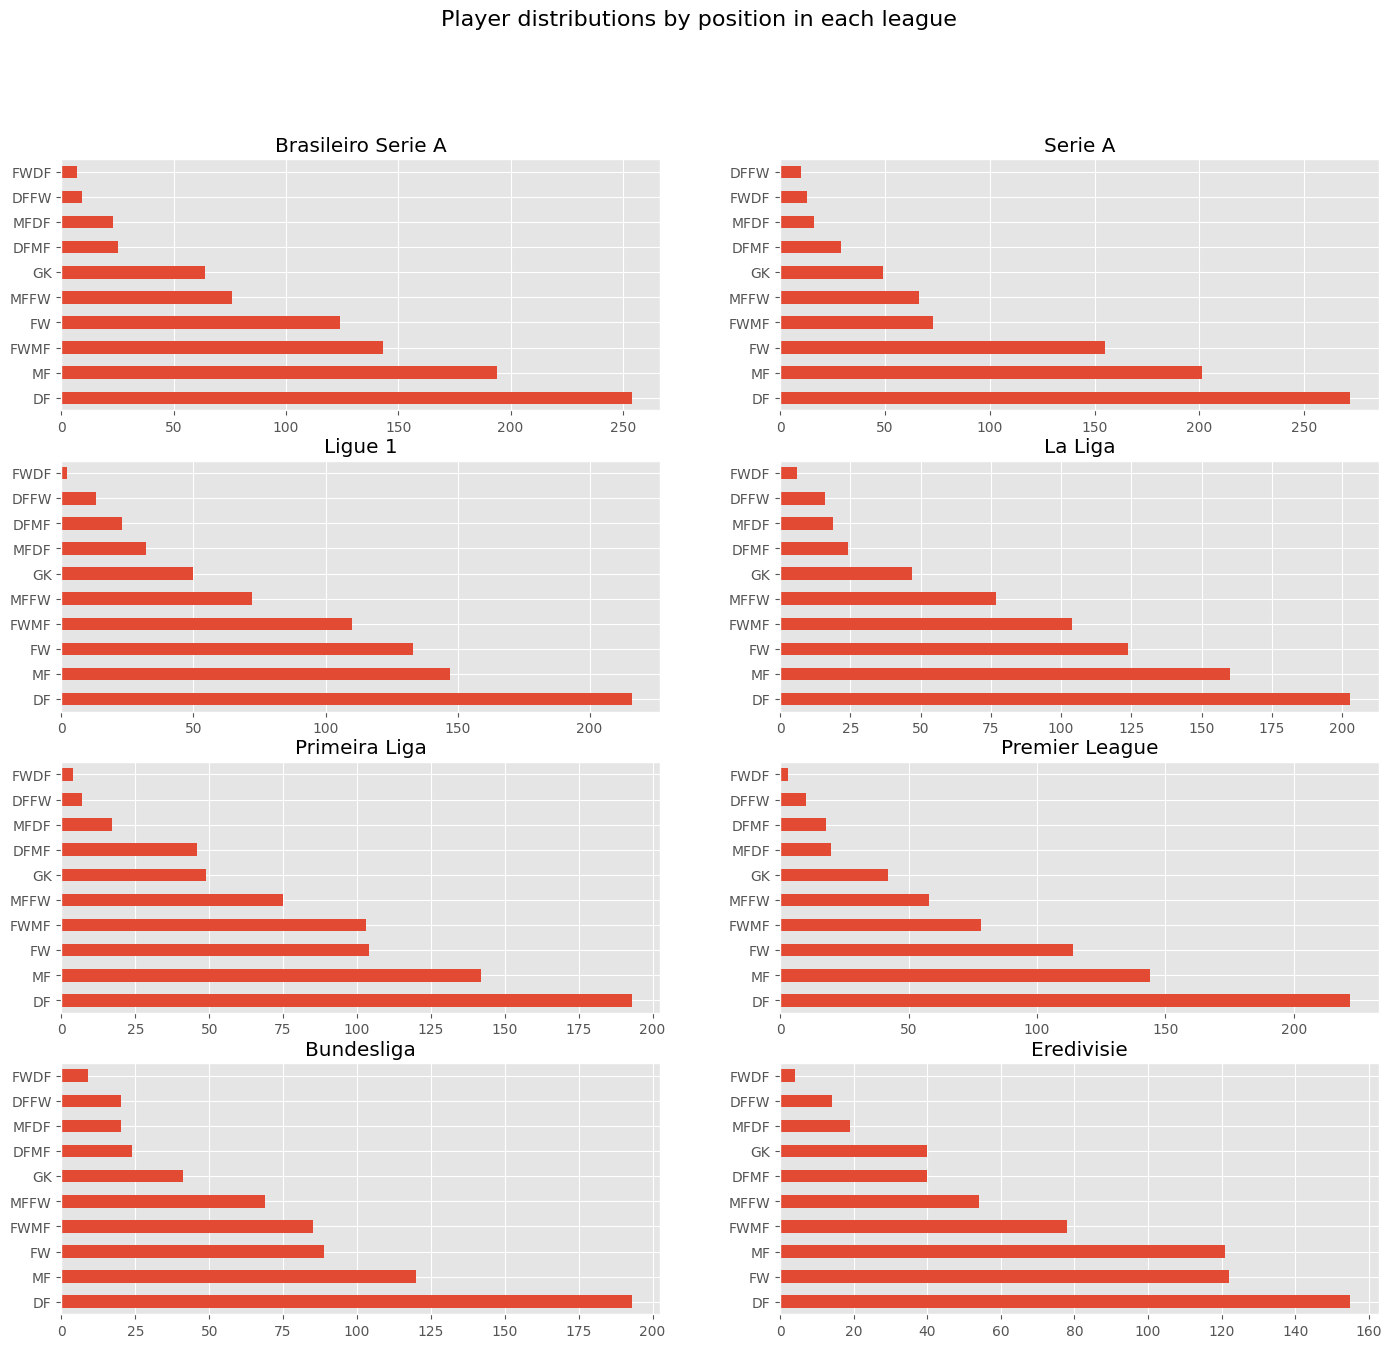

In [56]:
fig, axes = plt.subplots(4, 2, figsize = (17, 15))
data.query(f"Comp == 'Brasileiro Serie A'").Pos.value_counts().plot.barh(ax=axes[0, 0]).set_title('Brasileiro Serie A')
data.query(f"Comp == 'Serie A'").Pos.value_counts().plot.barh(ax=axes[0, 1]).set_title('Serie A')
data.query(f"Comp == 'Ligue 1'").Pos.value_counts().plot.barh(ax=axes[1, 0]).set_title('Ligue 1')
data.query(f"Comp == 'La Liga'").Pos.value_counts().plot.barh(ax=axes[1, 1]).set_title('La Liga')
data.query(f"Comp == 'Primeira Liga'").Pos.value_counts().plot.barh(ax=axes[2, 0]).set_title('Primeira Liga')
data.query(f"Comp == 'Premier League'").Pos.value_counts().plot.barh(ax=axes[2, 1]).set_title('Premier League')
data.query(f"Comp == 'Bundesliga'").Pos.value_counts().plot.barh(ax=axes[3, 0]).set_title('Bundesliga')
data.query(f"Comp == 'Eredivisie'").Pos.value_counts().plot.barh(ax=axes[3, 1]).set_title('Eredivisie')
fig.suptitle('Player distributions by position in each league', fontsize = 16)


We can see that the trend seen earlier is repeated in each league, with notable changes in just two leagues:
- The Dutch (Eredivisie), where the number of forwards equals the number of midfielders, which was not seen in other championships.

- The Brazilian (Brasileiro Serie A), where the number of forwarding midfielders exceeds the number of forwards entered in the competition.

### **Q2 - Which competition has the most active players?**

Text(0.5, 1.0, 'Number of players per competition')

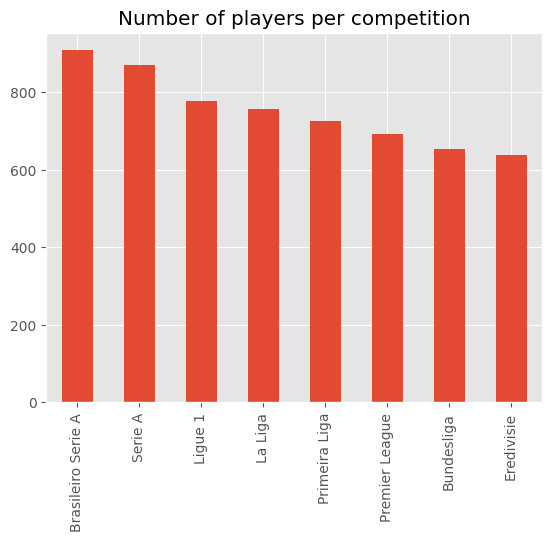

In [21]:
# Counting how many players with a score greater than 0 in each competition
data[data['90s']>0].Comp.value_counts().plot.bar()
plt.title('Number of players per competition')

After seeing the graph, a thought came to my mind: does a greater number of players make the average minutes played less?

In [27]:
# Calculating the amount of minutes played by each player
data['Min'] = data['90s'] * 90

In [99]:
# Grouping the data
mean_minPerComp = data.groupby('Comp')['Min'].mean().to_frame()
comp_qtd_df = data[data['90s']>0].Comp.value_counts().to_frame().reset_index().rename(columns = {'Comp':'qtd',
                                                                                                 'index':'Comp'})
minQtdPerComp = mean_minPerComp.merge(comp_qtd_df, on = 'Comp')

Text(0.5, 1.0, 'Correlation between the average minutes played and the number of players per league')

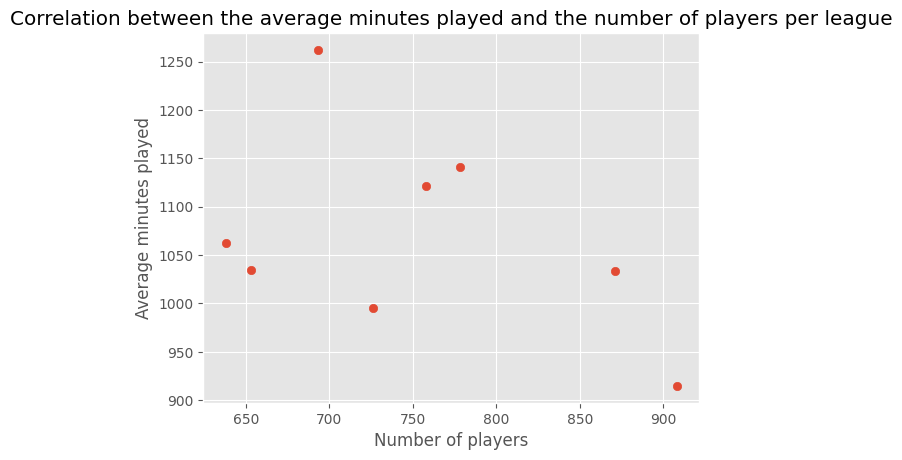

In [101]:
# Plotting the correlation between the variables
plt.scatter(x = minQtdPerComp.qtd, y = minQtdPerComp.Min)

# Adding a title and labels
plt.xlabel('Number of players', fontweight='bold')
plt.ylabel('Average minutes played', fontweight='bold')
plt.title('Correlation between the average minutes played and the number of players per league')

We can clearly see a negative correlation between the variables, that is, the more players registered in a league, the lower the average minutes played by each player.

### **Q3 - Does the player’s age affect the number of minutes he can play?**

Text(0, 0.5, 'Minutes played')

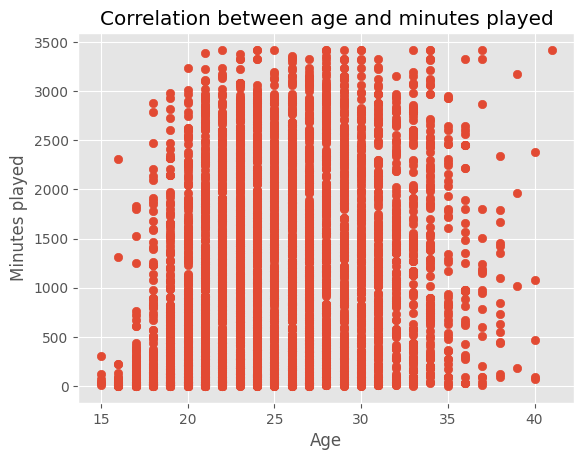

In [65]:
# Plotting the correlation between the variables
plt.scatter(x = data.Age, y = data.Min)

# Adding a title and labels
plt.title('Correlation between age and minutes played')
plt.xlabel('Age', fontweight='bold')
plt.ylabel('Minutes played', fontweight='bold')

- players between 18 and 35 years old have a very similar minute time.
- At the age of 35, the minute time starts to decrease a lot, resembling players who are starting their career at the age of 18.

### **Q4 - Does a team that keeps the ball and exchanges more passes necessarily have more goals?**

Text(0, 0.5, 'Passes')

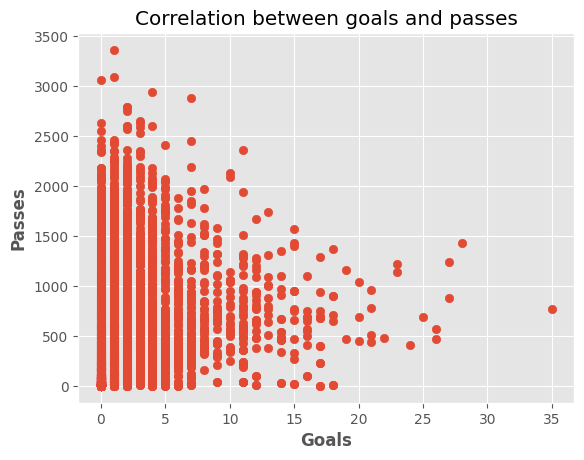

In [103]:
# Plotting the correlation between the variables
plt.scatter(x = data.Gls, y = data.Att_Passes)

# Adding a title and labels
plt.title('Correlation between goals and passes')
plt.xlabel('Goals', fontweight='bold')
plt.ylabel('Passes', fontweight='bold')

Here, we can see a slight negative correlation, that is, the more passes the player exchanges, the less he scores goals. Let's analyze passing data from attackers, midfielders and defenders to strengthen or reject this hypothesis.

In [122]:
df_gls = data.groupby('Pos').Gls.mean().loc[['DF', 'MF', 'FW']].to_frame().reset_index()
df_passes = data.groupby('Pos').Att_Passes.mean().loc[['DF', 'MF', 'FW']].to_frame().reset_index()
df_glsPerPasses = df_gls.merge(df_passes, on = 'Pos')

Text(0.5, 1.0, 'Passes per Position')

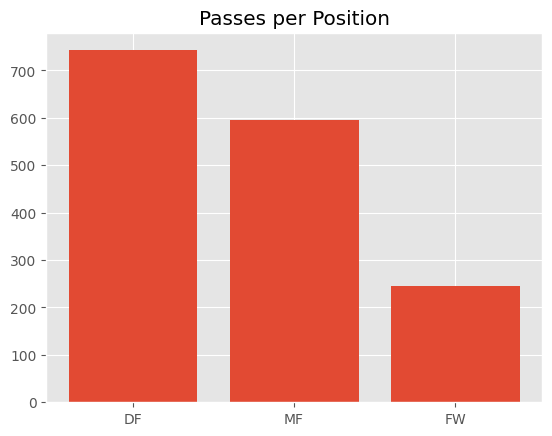

In [168]:
plt.bar(df_glsPerPasses['Pos'], df_glsPerPasses['Att_Passes'])
plt.title('Passes per Position')


Text(0.5, 1.0, 'Goals per Position')

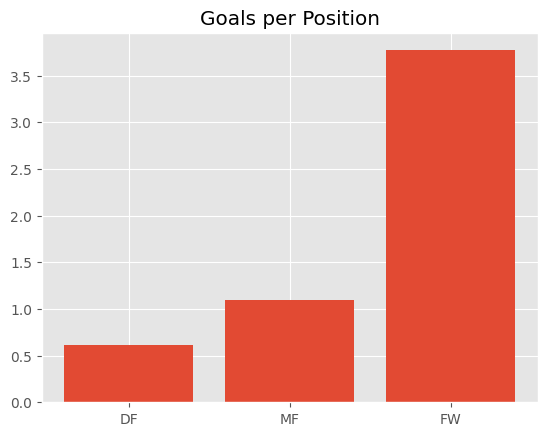

In [167]:
plt.bar(df_glsPerPasses['Pos'], df_glsPerPasses['Gls'])
plt.title('Goals per Position')
